# CSCA-5642: Monet GAN Image Generation Project #
#### Develop a GAN neural network with a generator model and a discriminator model to generate 7000 to 10,000 images from an input set of 7000 photos. ####
    
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5642-week5/tree/main](https://github.com/alme9155/csca-5642-week5/tree/main)  

## I. Brief Description of the Project and Data ##

This project aims to create a generative adversarial network (GAN) that generates images resembling Monet's paintings.
- Submission will be evaluated by inception score MiFID(Memorization-informed Fréchet Inception Distance)
- MiFID score is a modification of Fréchet Inception Distance (FID).
- The smaller the MiFID value, the better the generated images will be. 

### Dataset: ####
* The dataset contains 4 data directories: "monet_tfrec", "photo_tfrec", "monet_jpg", "photo_jpg"
* The monet_tfrec and monet_jpg directories contain the same painting images
* The photo_tfrec and photo_jpg directories contain the same photos.

|Directory        | Dimension      | Size      | Structure   |
|:----------------|----------------|:----------|:-----------:|
| monet_tfrec | 300   | 256x256 | JPEG |
| photo_tfrec | 300   | 256x256 | JPEG |
| monet_jpg   | 7028  | 256x256 | JPEG |
| photo_jpg   | 7028  | 256x256 | JPEG |


### Competition Rules ###
* Create an Images.zip that contains 7,000-10,000 images sized 256x256.

## II. Exploratory Data Analysis (EDA) ##
- Review the total number of monet paintings in tref format (File Count)
- Review the total number of photos in tfref format (File Count)
- Inspect image dimension (width x height) of monets paintings
- Inspect image dimension (width x height) of photos
- Display sample monet paints and photos

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under t 4ehe input directory

import os

jpg_file_count =0
tfrec_file_count = 0

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"[{dirname}]")

    for filename in filenames:
        if filename.endswith('.jpg'):
            jpg_file_count +=1
            if jpg_file_count < 3:
                print("\t"+os.path.join(dirname, filename))
            elif jpg_file_count == 3:
                print("\t...")
        elif filename.endswith('.tfrec'):
            tfrec_file_count +=1
            if tfrec_file_count < 3:
                print("\t"+os.path.join(dirname, filename))
            elif tfrec_file_count == 3:
                print("\t...")
        else:        
            print(os.path.join(dirname, filename))
    if jpg_file_count > 0:
        print(f"\n\tTotal number of .jpg files in {dirname}: {jpg_file_count}")
        jpg_file_count =0
    if tfrec_file_count > 0:
        print(f"\n\tTotal number of .tfrec files in {dirname}: {tfrec_file_count}")
        tfrec_file_count =0
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[/kaggle/input]
[/kaggle/input/gan-getting-started]
[/kaggle/input/gan-getting-started/monet_jpg]
	/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
	/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
	...

	Total number of .jpg files in /kaggle/input/gan-getting-started/monet_jpg: 300
[/kaggle/input/gan-getting-started/photo_tfrec]
	/kaggle/input/gan-getting-started/photo_tfrec/photo12-352.tfrec
	/kaggle/input/gan-getting-started/photo_tfrec/photo11-352.tfrec
	...

	Total number of .tfrec files in /kaggle/input/gan-getting-started/photo_tfrec: 20
[/kaggle/input/gan-getting-started/photo_jpg]
	/kaggle/input/gan-getting-started/photo_jpg/fb97febc5f.jpg
	/kaggle/input/gan-getting-started/photo_jpg/c54c5368af.jpg
	...

	Total number of .jpg files in /kaggle/input/gan-getting-started/photo_jpg: 7038
[/kaggle/input/gan-getting-started/monet_tfrec]
	/kaggle/input/gan-getting-started/monet_tfrec/monet12-60.tfrec
	/kaggle/input/gan-getting-started/monet_tfrec/monet16-60.tfrec


Showing 5 random Photo images:


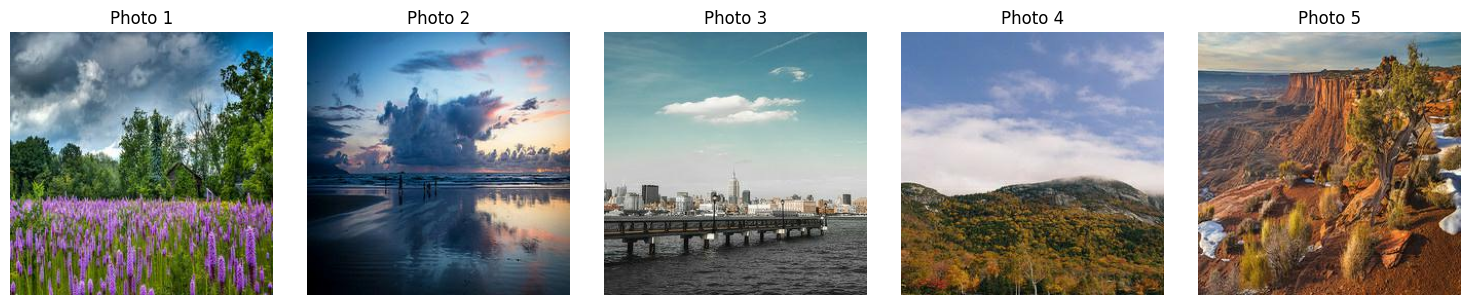

Showing 5 random Monet paintings:


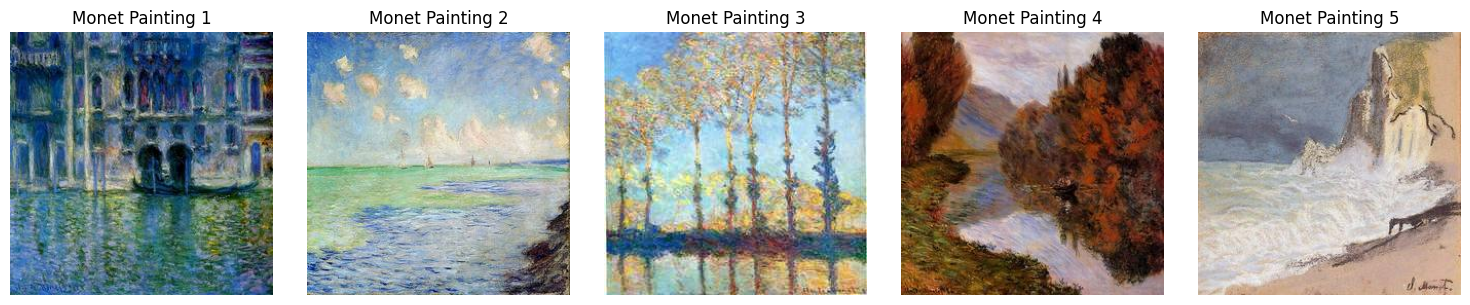

In [8]:
# Display sample files
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

# Show five random photo images
def show_random_photos(folder, label, n=5):
    sample_files = random.sample(os.listdir(folder), n)
    plt.figure(figsize=(15, 3))
    for i, file in enumerate(sample_files):
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{label} {i+1}")
    plt.tight_layout()
    plt.show()


# Run both
print("Showing 5 random Photo images:")
show_random_photos(photo_jpg_dir, 'Photo', n=5)
print("Showing 5 random Monet paintings:")
show_random_photos(monet_jpg_dir, 'Monet Painting', n=5)


In [26]:
# examine images in data directories
import os
import cv2
from PIL import Image

# data directory
INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

EXPECTED_SIZE = (256, 256)
EXPECTED_MODE = "RGB"  
PIXEL_RANGE = (-1.0, 1.0)

def examine_files(image_dir):
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_dir, filename)
            with Image.open(img_path) as img:
                # Check size and mode
                if img.size != EXPECTED_SIZE or img.mode != EXPECTED_MODE:
                    print("Needs resizing and preprocessing:")
                    print(f"File: {filename}")
                    print(f"Size: {img.size}, Mode: {img.mode}")
                    break
                    
                image_np = np.asarray(img).astype(np.float32)
                image_np = (image_np / 127.5) - 1.0  # normalize to [-1, 1]
                
                # Check pixel range
                if not (np.min(image_np) >= -1.0 and np.max(image_np) <= 1.0):
                #if not is_pixel_range_valid(image_np):
                    print("Pixel values in {filename} out of range [-1, 1]:")
                    print(f"File: {filename}")
                    print(f"Pixel min: {np.min(image_np)}, max: {np.max(image_np)}")
                    break
    else:
        print(f"All images in {image_dir} are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]")
        print(f"No further data pre-processing is required for {image_dir}")

examine_files(monet_jpg_dir)
examine_files(photo_jpg_dir)


All images in /kaggle/input/gan-getting-started/monet_jpg are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]
No further data pre-processing is required for /kaggle/input/gan-getting-started/monet_jpg
All images in /kaggle/input/gan-getting-started/photo_jpg are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]
No further data pre-processing is required for /kaggle/input/gan-getting-started/photo_jpg


### Brief Conclusion of EDA ###

* All image files in the corresponding image directory are already normalized to the required dimensions.
* No further pre-processing is required before applying an adversarial generative neural network.
  - [ monet_tfrec ] : 300 Monet paintings sized 256x256 with RGB channels in JPEG format
  - [ photo_tfrec ]: 300 Monet paintings sized 256x256 with RGB channels in TFRecord format
  - [ monet_jpg ] : 7028 photos sized 256x256 with RGB channels in JPEG format
  - [ photo_jpg ] : 7028 photos sized 256x256 with RGB channels in TFRecord format

## III. Generative Neural Network ##



In [ ]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

In [16]:
import os
import cv2
import random

# data directory
INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

# randomly pick one file to inspect
def inspect_image_dimension(image_dir):
    print(f"Inspect image file in {image_dir}:")
    all_images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg'))]
    selected_file = random.choice(all_images)
    img_path = os.path.join(image_dir, selected_file)

    img = cv2.imread(img_path)
    if img is not None:
        height, width, channels = img.shape
        print(f"\tRandom file: '{selected_file}'")
        print(f"\tWidth: {width}, Height: {height}, Channels: {channels}\n")

inspect_image_dimension(monet_jpg_dir)
inspect_image_dimension(photo_jpg_dir)

Inspect image file in /kaggle/input/gan-getting-started/monet_jpg:
	Random file: '9908d1daa9.jpg'
	Width: 256, Height: 256, Channels: 3

Inspect image file in /kaggle/input/gan-getting-started/photo_jpg:
	Random file: '50e2f57e76.jpg'
	Width: 256, Height: 256, Channels: 3



- monet_tfrec : 300 Monet paintings sized 256x256 in JPEG format
- photo_tfrec : 300 Monet paintings sized 256x256 in TFRecord format
- monet_jpg : 7028 photos sized 256x256 in JPEG format
- photo_jpg : 7028 photos sized 256x256 in TFRecord format